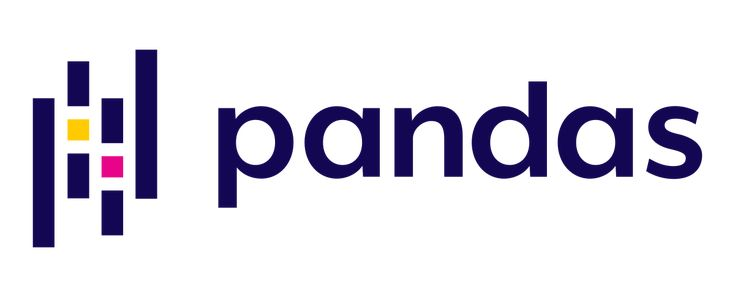

In [98]:
import pandas as pd ; pd.__version__

'2.2.3'

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**1. The two core data structures: Series & DataFrame**</span> <br>

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- The Series**</span> <br>

- A `Series` is a **one-dimensional labeled array**.<br>
  You can think of it as a single column in a spreadsheet.<br>
  It has two main components:

    - The data itself.
    - An associated index that labels the data.

- Create a series from a list

In [99]:
series_from_list = pd.Series([10, 20, 30, 40, 50])
series_from_list

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [100]:
# if you want it as a numpy array
series_from_list.values

array([10, 20, 30, 40, 50])

In [101]:
# if you want to custom indices
custom_indices = pd.Series([1, 2, 3], index=['one', 'two', 'three'])
custom_indices

one      1
two      2
three    3
dtype: int64

- Creating a Series from a Dictionary

In [102]:
# the key here will be the index 
city_population = {'Cairo': 21, 'Lagos': 22, 'Kinshasa': 17, 'Giza': 9}
series_from_dict = pd.Series(city_population)

series_from_dict

Cairo       21
Lagos       22
Kinshasa    17
Giza         9
dtype: int64

In [103]:
# slicing a series
slice_by_name = series_from_dict['Cairo': 'Kinshasa'] # the start and the end are included
slice_by_index = series_from_dict[:2] # The end is not included

print("slicing by name")
print(slice_by_name, '\n')

print(f'slicing by index')
print(slice_by_index)

slicing by name
Cairo       21
Lagos       22
Kinshasa    17
dtype: int64 

slicing by index
Cairo    21
Lagos    22
dtype: int64


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- The DataFrame**</span> <br>

- The `DataFrame` is the primary data structure in Pandas.<br>

    It's a **two-dimensional labeled array with columns** <br>
    that can be of different types. <br>
    You can think of it as a spreadsheet, a SQL table,<br>
    or a dictionary of Series objects. <br>
    It is, by far, the most used feature of the library.

- Creating from a Dictionary of Lists

In [104]:
# Data for the DataFrame
# the key here will be the column name 

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'Los Angeles', 'Chicago']}

# Create the DataFrame
df_from_dict = pd.DataFrame(data)
df_from_dict

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


- Creating from a NumPy Array

In [105]:
import numpy as np

# Create a 5x3 NumPy array with random numbers
np_array = np.random.rand(5, 3)

# Create a DataFrame from the NumPy array, providing custom column names
df_from_numpy = pd.DataFrame(np_array, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df_from_numpy

,Feature_1,Feature_2,Feature_3
0,0.059021,0.401845,0.466045
1,0.269854,0.688631,0.930480
2,0.505264,0.425988,0.629290
3,0.624393,0.723066,0.872716
4,0.020872,0.463130,0.352653


- Creating from a List of Dictionaries

In [106]:
# A list where each dictionary represents a row
list_of_dicts_data = [{'Name': 'David', 'Age': 40, 'City': 'Boston'},
                      {'Name': 'Eva', 'Age': 28}, # Note: 'City' is missing
                      {'Name': 'Frank', 'Age': 33, 'City': 'Houston'}]

# Create the DataFrame
df_from_lod = pd.DataFrame(list_of_dicts_data)
df_from_lod

,Name,Age,City
0,David,40,Boston
1,Eva,28,NaN
2,Frank,33,Houston


- Creating from a Dictionary of Series

In [107]:
# Creating several Series with a shared index
names = pd.Series(['Alice', 'Bob', 'Charlie'], index=[0, 1, 2])
ages = pd.Series([25, 30, 35], index=[0, 1, 2])
cities = pd.Series(['New York', 'Los Angeles', 'Chicago'], index=[0, 1, 2])

# Using a dictionary to combine the Series into a DataFrame
df_from_series = pd.DataFrame({'Name': names, 'Age': ages, 'City': cities})
df_from_series

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


- You can access the row and column labels directly <br>
 using the `.index` and `.columns` attributes.

In [108]:
# Get the column labels
print("--- Column Labels ---")
print(df_from_dict.columns)

# Get the row labels (the index)
print("\n--- Row Labels (Index) ---")
print(df_from_dict.index)

--- Column Labels ---
Index(['Name', 'Age', 'City'], dtype='object')

--- Row Labels (Index) ---
RangeIndex(start=0, stop=3, step=1)


- Selecting a Column

In [109]:
# Select the 'Age' column
age_column = df_from_dict['Age']

print("--- The 'Age' Column (which is a Series) ---")
print(age_column)

# the type of the selected lonely column will be 'Series'
print(f"\nType of the selected column: {type(age_column)}")

--- The 'Age' Column (which is a Series) ---
0    25
1    30
2    35
Name: Age, dtype: int64

Type of the selected column: <class 'pandas.core.series.Series'>


- Selecting a Single Value

In [110]:
df_from_dict['Age'][1] # from column 'Age' and row with index '1' 

np.int64(30)

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**2. Loading, Saving, and Discovering Data**</span> <br>

* <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif;">In practice, you'll rarely create a DataFrame by hand.</span> <br>

    <font size="3">  Your data will live in external files, **like CSVs**,**Excel sheets**, or **databases**.<br>
  This section covers the crucial first step in any data analysis project: **loading data into a DataFrame**.<br>
    We'll then cover the essential methods for performing an initial inspection to understand its structure and content.</font> 


- Lets download data from **Kaggle** website. <br>

    - We will use the **Titanic** dataset
    - Download the **train.csv** file from here [Click here to go](https://www.kaggle.com/c/titanic/data?select=train.csv)

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Reading Data from Files**</span> <br>

##### - `pd.read_csv()` Method

The **pd.read_csv()** function is the workhorse for reading tabular data from text files.

In [111]:
# You can specify a column to be used as the DataFrame's index (row labels) using 'index_col' parameter. 
df = pd.read_csv('train.csv', index_col='PassengerId') 

- For Excel files: `pd.read_excel('filename.xlsx')`

- For JSON files: `pd.read_json('filename.json')`

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Discovering The Dataset**</span> <br>

##### - Quick Look at the data using: `.head()`, `.tail()` and .`sample()`

**These methods let you peek at the data from different angles.**

- **.head(n)** shows the first n rows (default is 5).

- **.tail(n)** shows the last n rows (default is 5).

- **.sample(n)** shows a random sample of n rows.<br>

In [112]:
# Display the first 5 rows
print("--- First 5 Rows (head) ---")
display(df.head())

# Display the Last 5 rows
print("--- Last 5 Rows (tail) ---")
display(df.tail())

# Display a random sample of 5 rows
print("\n--- Random 5 Rows (sample) ---")
display(df.sample(5))


--- First 5 Rows (head) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--- Last 5 Rows (tail) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



--- Random 5 Rows (sample) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S


##### - Summary of the dataset: `.info()`

- The number of rows and columns.

- Column names.

- The number of non-null values (your first look at missing data).

- The data type (Dtype) of each column.

In [113]:
# Print the technical summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


##### - Statistical Overview: `.describe()`

This method provides a **descriptive statistics** for all numerical columns.<br>
This helps you **quickly understand the scale and distribution of your data**.

In [114]:
# Get the statistical summary for all numerical columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The standard `.describe()` function is great for **numbers**,<br>
 but what about columns containing **text**, like 'Name' or 'Sex'?<br>
  By adding the `include='object'` parameter, you can get a descriptive summary for **all non-numerical columns.**

In [115]:
# Describe only the categorical (object) columns
print("--- Categorical Column Summary ---")
display(df.describe(include='object'))

--- Categorical Column Summary ---


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


- **count** : The number of non-empty entries.

- **unique** : The number of distinct categories in the column. For the 'Sex' column, this would be 2 ('male', 'female').

- **top** : The most frequently occurring value. This quickly shows you the most common category.

- **freq** : The frequency of the top value. It tells you how many times the most common value appeared.

If you want a **single overview of every column**, both numerical and categorical,<br>
 you can use `include='all'`. Pandas will provide statistics applicable to each column's data type<br>
  and show NaN (Not a Number) where a metric doesn't apply (like the mean of a text column).

In [116]:
# Describe all columns, numerical and categorical
print("\\n--- All Column Summary ---")
display(df.describe(include='all'))

\n--- All Column Summary ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### - Counting Unique Values

When working with a categorical column, you'll often need to know what categories are present.

- To see a list of **all the unique values**, use `.unique()`.<br>
  This is great for understanding the specific options available in a column.

- To get just the **count of those unique values**, use `.nunique()`.

In [117]:
# Get all unique values in the 'Embarked' column
print(f"Unique values in Embarked column: {df['Embarked'].unique()}\n")

# Get the number of unique values
print(f"Number of unique values in Embarked column: {df['Embarked'].nunique()}")

Unique values in Embarked column: ['S' 'C' 'Q' nan]

Number of unique values in Embarked column: 3


- Counting Frequencies with `.value_counts()`

This is one of the most useful methods for exploring categorical data.<br>
 It goes beyond just identifying unique values and tells you **how many times each value appears**.

In [118]:
# Get the frequency of each unique value
print("--- Value Counts for Embarked Column ---")
print(df['Embarked'].value_counts())

--- Value Counts for Embarked Column ---
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Viewing Proportions with `normalize=True`

In [119]:
# Get the proportion (percentage) of each unique value
print("\\n--- Proportions for Embarked Column ---")
print(df['Embarked'].value_counts(normalize=True))

\n--- Proportions for Embarked Column ---
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


##### - Basic Attributes: `.shape`, `.columns` and `.index`

In [120]:
# Get the shape (rows, columns)
print(f"The shape of the DataFrame is: {df.shape}")

# Get the column labels
print(f"\nThe column labels are: {df.columns.tolist()}")

# Get the row labels (the index). Note it's now PassengerId!
print(f"\nThe index is: {df.index[:5]}") # too long so i just got the first five 

The shape of the DataFrame is: (891, 11)

The column labels are: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

The index is: Index([1, 2, 3, 4, 5], dtype='int64', name='PassengerId')


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Saving Datasets**</span> <br>

- After modifying your DataFrame, you'll often want to save it to a new file.

- `to_csv()` Method

- The **.to_csv()** method writes your DataFrame to a CSV file. <br>

The most important parameter is `index=False`.<br>
 If your index is just the default 0, 1, 2..., you almost always<br>
  want to use **index=False** to prevent Pandas from writing it as <br>
   a new unnamed column in your file.<br>
    However, since we have a meaningful index (PassengerId), we might want to keep it. Let's see both cases.

In [121]:
# Create a new DataFrame of just the survivors
survivors_df = df[df['Survived'] == 1]

# Save to a new CSV, this time KEEPING our meaningful 'PassengerId' index
survivors_df.to_csv('titanic_survivors_with_index.csv')

# Save to another CSV, this time EXCLUDING the index
survivors_df.to_csv('titanic_survivors_no_index.csv', index=False) 

print("Two new CSV files have been saved.")

Two new CSV files have been saved.


### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**3. Selection, Indexing and Filtering**</span> <br>

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Selecting Columns**</span> <br>

- Selecting a single column returns a Pandas **Series**.

- Selecting multiple columns returns a new Pandas **DataFrame**.

In [122]:
# To select a single column, use its name in square brackets.
# The result is a Series.
name_series = df['Name']
print("--- A Single Column (a Series) ---")
name_series.head()

--- A Single Column (a Series) ---


PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [123]:
# To select multiple columns, pass a list of column names.
# Note the double square brackets [[...]]. The result is a DataFrame.
subset_df = df[['Name', 'Age', 'Sex', 'Pclass']]
print("\n--- Multiple Columns (a DataFrame) ---")
subset_df.head()


--- Multiple Columns (a DataFrame) ---


,Name,Age,Sex,Pclass
PassengerId,,,,
1,"Braund, Mr. Owen Harris",22.0,male,3
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1
3,"Heikkinen, Miss. Laina",26.0,female,3
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1
5,"Allen, Mr. William Henry",35.0,male,3


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Label-Based Selection with `.loc`**</span> <br>

- Slicing with .loc is inclusive of both the start and end labels.

In [124]:
# Select a single row by its index label (PassengerId 10)
print("--- Single Row (PassengerId 10) ---")
df.loc[10] # here we got the 10th row only

--- Single Row (PassengerId 10) ---


Survived                                      1
Pclass                                        2
Name        Nasser, Mrs. Nicholas (Adele Achem)
Sex                                      female
Age                                        14.0
SibSp                                         1
Parch                                         0
Ticket                                   237736
Fare                                    30.0708
Cabin                                       NaN
Embarked                                      C
Name: 10, dtype: object

In [125]:
# Select multiple rows by a list of index labels
print("\n--- Multiple Rows by List ---")
df.loc[[1, 10, 100]] # using fancy indexing as we discussed in the numpy tutorial


--- Multiple Rows by List ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S


In [126]:
# Select a range of rows by label. This slice is INCLUSIVE.
print("\n--- Slice of Rows (PassengerId 5 through 10) ---")
df.loc[5:10]


--- Slice of Rows (PassengerId 5 through 10) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [127]:
# Select a slice of rows AND specific columns by name
print("\n--- Slice of Rows and Specific Columns ---")
df.loc[5:10, ['Name', 'Age', 'Ticket']]


--- Slice of Rows and Specific Columns ---


,Name,Age,Ticket
PassengerId,,,
5,"Allen, Mr. William Henry",35.0,373450
6,"Moran, Mr. James",NaN,330877
7,"McCarthy, Mr. Timothy J",54.0,17463
8,"Palsson, Master. Gosta Leonard",2.0,349909
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,347742
10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,237736


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Position-Based Selection with `.iloc`**</span> <br>

- Slicing with .iloc is exclusive of the end position, just like standard Python slicing.

In [128]:
# Select the first row (at position 0)
print("--- First Row (position 0) ---")
df.iloc[0]

--- First Row (position 0) ---


Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [129]:
# Select the first 5 rows, and the 1st, 3rd, and 6th columns by position
print("\n--- Slice of Rows and Columns by Position ---")
df.iloc[0:5, [0, 2, 5]] # Columns: Pclass, Sex, Fare


--- Slice of Rows and Columns by Position ---


,Survived,Name,SibSp
PassengerId,,,
1,0,"Braund, Mr. Owen Harris",1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,1,"Heikkinen, Miss. Laina",0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
5,0,"Allen, Mr. William Henry",0


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Scalar Access: `.at[]` and `.iat[]`**</span> <br>

- While `.loc[]` and `.iloc[]` are powerful tools for **selecting and slicing data**,<br>
 Pandas provides two specialized methods, `.at[]` and `.iat[]`,<br>
  for one specific task: **accessing a single value (a scalar) with maximum speed.**

- Label-Based Access with `.at[]`

Think of `.at[]` as a high-performance version of `.loc[]` that works only for a **single cell**.<br>
 You provide the exact row label and column label to get the value.

- It looks for the row with the index label 10.

- It looks for the column with the label 'Name'.

- It directly returns the single value at that intersection without the overhead of creating a Series or DataFrame object.

In [130]:
# Let's get the 'Name' for the passenger with PassengerId 10
name = df.at[10, 'Name']
print(f"Name of PassengerId 10 is: {name}")

Name of PassengerId 10 is: Nasser, Mrs. Nicholas (Adele Achem)


- Integer-Based Access with `.iat[]`

Similarly, `.iat[]` is the high-performance equivalent of `.iloc[]` for accessing a **single cell**.<br>
 You provide the integer position for the row and column.

- It goes to the row at the 9th integer position (the 10th row).

- It goes to the column at the 2nd integer position (the 3rd column).

- It quickly returns the value from that specific cell.

In [131]:
# Let's get the value at the 10th row (position 9) and 3rd column (position 2)
# This corresponds to the 'Name' of PassengerId 10
value = df.iat[9, 2]
print(f"\nValue at row position 9, column position 2 is: {value}")


Value at row position 9, column position 2 is: Nasser, Mrs. Nicholas (Adele Achem)


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Boolean Masking (Conditional Filtering)**</span> <br>

This is the most powerful and common way to filter data.<br>
 The idea is to create a Series of True/False values (a "mask") <br> 
 based on a condition and then use that mask to select rows from the DataFrame where the value is True.

In [132]:
# 1. Create the boolean mask
mask_over_60 = df['Age'] > 60

# 2. Apply the mask to the DataFrame
df[mask_over_60].head() # Using .head() to keep the output tidy

# if you want it in a single line
# df[df['Age'] > 60]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


- Multiple Conditions

You can combine conditions using `&` (and) and `|` (or).<br>
**Important**: Each condition must be wrapped in parentheses () due to Python's operator precedence rules

In [133]:
# Use '&' for AND
# Note the parentheses around each condition
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


- Filtering with `.isin()`
    
    - If you want to filter a column based on a list of multiple possible values,<br>
     `.isin()` is a very convenient shortcut for multiple | (or) conditions.

In [134]:
# Find passengers who embarked from specific ports
df[df['Embarked'].isin(['S', 'Q'])].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**4. Essential Data Cleaning Operations**</span> <br>

* <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif;">Data in the real world is messy</span> <br>

    <font size="3"> It often has **missing values**, **duplicate entries**, or is **in a format that isn't ready for analysis**.<br>
  Data cleaning is the critical **process of identifying and correcting these issues**.<br>
   This is often where data analysts and scientists spend the majority of their time.</font> 

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Discovering Missing Data (NaN)**</span> <br>

##### - Checking for Nulls with `.isnull()` and `.notnull()`

These methods return a **DataFrame of the same shape as your original**,<br>
 but with boolean values: **True if a value is missing** (.isnull()) or **False if it's not** (.notnull()).<br>
  While useful, they are most powerful when combined with other methods.

##### - Counting Missing Values per Column

This is the most common first step in any data cleaning process.<br>
 By chaining `.sum()` after `.isnull()`, you can get **a count of all NaN values in each column.**

In [135]:
# Count null values in each column
print("--- Missing Values Per Column ---")
print(df.isnull().sum())

--- Missing Values Per Column ---
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


##### - Finding the Total Number of Missing Values

To get a single number representing<br>
 the total count of empty cells in the entire DataFrame, you can chain `.sum()` **twice**.

In [136]:
# Get the grand total of all missing values
total_missing = df.isnull().sum().sum()
print(f"Total number of missing cells in the DataFrame: {total_missing}")

Total number of missing cells in the DataFrame: 866


##### - Calculating the Percentage of Missing Data

Percentages are often more insightful than raw counts.<br>
 Using `.mean()` gives you the **proportion of missing values in each column.**

In [137]:
# Calculate the percentage of missing values per column
print("--- Percentage of Missing Values Per Column ---")
print(df.isnull().mean() * 100)

--- Percentage of Missing Values Per Column ---
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


##### - Viewing the Rows with Missing Data

To inspect the actual rows that are incomplete, you can use `.any(axis=1)` to create a boolean mask.

In [138]:
# Show the first 5 rows that have at least one missing value
print("--- Rows with Missing Values ---")
display(df[df.isnull().any(axis=1)].head())

--- Rows with Missing Values ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Dealing with Missing Data**</span> <br>

- Once you've identified the missing values, you can either remove them or fill them in (a process called imputation).

##### - Strategy 1: Dropping Missing Values with `.dropna()`

- `df.dropna()` : By default, this **drops any row containing at least one NaN value**.

- `axis=1` : This parameter tells pandas **to drop columns** that contain NaN values **instead of rows**.

- `how='all'` : This parameter tells pandas to only drop a row or column **if all of its values are NaN**.

In [139]:
# The 'Embarked' column has only 2 missing values. It's safe to drop these rows.
df_dropped = df.dropna(subset=['Embarked'])
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping NaNs from 'Embarked': {len(df_dropped)}")

Original number of rows: 891
Number of rows after dropping NaNs from 'Embarked': 889


##### - Strategy 2: Filling Missing Values with `.fillna()`

- Filling with a Static Value

You can replace **NaN** with a constant number or string.<br>
 This is useful for creating a distinct category for missing data.

In [140]:
# The 'Cabin' column has too many missing values to fill meaningfully.
# Let's fill them with a placeholder string 'Unknown'.
df['Cabin'].fillna('Unknown', inplace=True)
display(df.head())

C:\Users\moham\AppData\Local\Temp\ipykernel_14204\3781609861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


- Filling with a Calculated Value **(Mean/Median/Mode)**:
    - A more robust method is to use a measure of central tendency.

        - Median (**for skewed numerical data**): <br>
        The 'Age' column can be filled with the median age, which is less<br> sensitive to outliers than the mean.

        - Mode (**for categorical data**):<br>
        The 'Embarked' column can be filled with its most frequent value.

In [141]:
# Fill missing 'Age' with the median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
df['Age'].fillna(median_age, inplace=True)

# Fill missing 'Embarked' with the mode
mode_embarked = df['Embarked'].mode()[0] # .mode() returns a Series
df['Embarked'].fillna(mode_embarked, inplace=True)

print("--- Missing Values After Filling ---")
print(df.isnull().sum())

--- Missing Values After Filling ---
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_14204\387211044.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_14204\387211044.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

- Filling with **Forward** / **Backward** Fill

    - The `method` parameter is useful for ordered data, like time series.

        - `method='ffill'` (forward fill):<br>
         Propagates the last valid observation forward.

        - `method='bfill'` (backward fill):<br>
         Propagates the next valid observation backward.

In [142]:
# Create a small sample Series with missing values
s = pd.Series([1, np.nan, np.nan, 4, 5, np.nan])

print("--- Forward Fill ---")
print(s.fillna(method='ffill'))

--- Forward Fill ---
0    1.0
1    1.0
2    1.0
3    4.0
4    5.0
5    5.0
dtype: float64


C:\Users\moham\AppData\Local\Temp\ipykernel_14204\3864649618.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(s.fillna(method='ffill'))


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Handling Duplicates**</span> <br>

##### - Identifying and Quantifying Duplicates

Before removing duplicates,<br>
 you first need to determine if you have any and, if so, how many.

- Checking for Duplicates with `.duplicated()`

    The **.duplicated()** method is your starting point.<br>
     It scans your DataFrame and returns a boolean Series (True/False)<br>  indicating whether a row is an exact copy of one that has already<br> appeared earlier in the DataFrame.

- Counting Duplicates with `.sum()`

    While seeing **True/False** values is useful,<br>
     a simple count is often more direct.<br>
      Since True is treated as 1 and False as 0,<br>
       you can chain `.sum()` to get a total count of duplicate rows.

In [143]:
# Create a temporary DataFrame with a duplicate row for demonstration
temp_df = pd.concat([df.head(3), df.head(1)], ignore_index=True)

# Count the total number of duplicate rows
duplicate_count = temp_df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 1


- Calculating the Percentage of Duplicates with `.mean()`

    To understand the scale of the duplication problem,<br>
     calculating the percentage can be very helpful.<br>
      Chaining `.mean()` gives you the **proportion of True values**.

In [144]:
# Calculate the percentage of duplicate rows
duplicate_percentage = temp_df.duplicated().mean() * 100
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")

Percentage of duplicate rows: 25.00%


##### - Removing Duplicates

- Once you've confirmed you have duplicates,<br>
 you can remove them using the `.drop_duplicates()` method.

- Dropping Exact Duplicates

    By default, `.drop_duplicates()`<br>
    removes all rows that are exact copies of an earlier row.

In [145]:
print(f"Original number of rows in temp_df: {len(temp_df)}")

# Drop the duplicate rows
# temp_df.drop_duplicates(inplace=True) This is also valid 
df_no_duplicates = temp_df.drop_duplicates()

print(f"Number of rows after dropping duplicates: {len(df_no_duplicates)}")

Original number of rows in temp_df: 4
Number of rows after dropping duplicates: 3


- Dropping Duplicates **Based on a Subset of Columns**

    This is **a more advanced and extremely useful technique**.<br>
     Sometimes, a row is only considered a duplicate if the values in<br>
      a specific set of columns are the same.<br>
       You can achieve this using the subset parameter.

    

In [146]:
# Drop rows where the 'Ticket' value is a duplicate
df_unique_tickets = df.drop_duplicates(subset=['Ticket'])

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after keeping unique tickets: {len(df_unique_tickets)}")

Original number of rows: 891
Number of rows after keeping unique tickets: 681


#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Transforming Data and Creating New Features**</span> <br>

Often, the raw data you have isn't in the right format for analysis.<br>
 You might need to convert **text categories to numbers**,<br>
  create new features from existing ones,<br>
   or apply a custom calculation to a column.<br>
    Pandas provides flexible tools like `.map()` and `.apply()` for these tasks.

- 1. Simple Value Substitution with `.map()`

    The **.map()** method is the perfect tool when you want to<br>
     substitute values in a column based on a dictionary (a one-to-one mapping).<br>
      It's a clean and highly readable way to convert categorical data<br>
       into a numerical format or to rename categories.
    
- **Use Case:** <br>
    Let's convert the 'Sex' column in our Titanic dataset<br>
     into a numerical format, where female is 1 and male is 0.

- `.map()` will go through each value in the 'Sex' column.<br>
     If it finds a key from our sex_map dictionary (like 'female'),<br>
      it replaces it with the corresponding value (1).

In [147]:
# Create a mapping dictionary
sex_map = {'female': 1, 'male': 0}

# Apply the map to the 'Sex' column to create a new column
df['Sex_numeric'] = df['Sex'].map(sex_map)

# Display the original and the new mapped column
display(df[['Sex', 'Sex_numeric']].head())

,Sex,Sex_numeric
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


- 2. Complex Transformations with `.apply()`

    For more complex transformations that go beyond a simple dictionary<br> mapping, `.apply()` is your **go-to method**.<br>
     It allows you to apply a custom function **to every value in a column**,<br> or even to entire rows.

- Applying a Function to a Single Column

    You can use `.apply()` with a lambda function to perform a<br>
     custom operation on each element of a column.

**Use Case** :<br>
 Let's engineer a 'Title' feature by extracting the title<br>
  (Mr, Mrs, Miss, etc.) from each passenger's name.

In [148]:
# We can define a function or use a lambda directly inside apply
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# See the result
print("--- Titles extracted from names ---")
print(df['Title'].value_counts())

--- Titles extracted from names ---
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


- Applying a Function to Multiple Columns

    You can also use `.apply()` to perform the same operation on<br>
     multiple columns at once.<br>
      This is very efficient for standardizing your data.

**Use Case** :<br>
  Let's select all the text-based (object) columns<br>
   and convert them to lowercase to ensure consistency.

In [149]:
# Identify the object columns
text_columns = df.select_dtypes(include='object').columns

# Apply the .lower() string method to each of these columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())

display(df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,unknown,s,0,mr
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c,1,mrs
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,unknown,s,1,miss
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s,1,mrs
5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,unknown,s,0,mr


- Applying a Function Across Rows `(axis=1)`

    This is one of **the most powerful features of `.apply()`**.<br>
     By setting **axis=1**, you can apply a function to each row<br>
      of your DataFrame. The function receives each row as a Series object,<br> allowing you to create a new feature based on the values of<br> multiple other columns in that same row.

**Use Case**:<br>
 Let's create a FamilySize feature by adding the values from the 'SibSp'<br> (siblings/spouses) and 'Parch' (parents/children) columns,<br>
  plus one for the passenger themselves.

**--> What this does:<br>**
    For every row in the DataFrame, pandas passes the row to our<br> calculate_family_size function. The function then accesses the 'SibSp'<br> and 'Parch' values for that specific row,<br>
     calculates the sum, and returns the result,<br>
      which is then used to populate our new 'FamilySize' column.

In [150]:
# Define a function that takes a row as input
def calculate_family_size(row):
    return row['SibSp'] + row['Parch'] + 1

# Apply the function across the rows
df['FamilySize'] = df.apply(calculate_family_size, axis=1)

# Display the result
display(df[['Name', 'SibSp', 'Parch', 'FamilySize']].head())

,Name,SibSp,Parch,FamilySize
PassengerId,,,,
1,"braund, mr. owen harris",1,0,2
2,"cumings, mrs. john bradley (florence briggs th...",1,0,2
3,"heikkinen, miss. laina",0,0,1
4,"futrelle, mrs. jacques heath (lily may peel)",1,0,2
5,"allen, mr. william henry",0,0,1


### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**5. Grouping and Aggregation**</span> <br>

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- The Core Concept: Split-Apply-Combine**</span> <br>

The best way to think about this is to imagine you're doing laundry.<br>
 You don't just dump everything in the machine.<br>
  You follow a logical process to get an organized result.

1. **SPLIT** (Sort into Piles):<br>
    First, you split your laundry into **groups** based on a rule,<br>
     like **whites**, **darks**, and **colors**.<br>
      In pandas, this is the `.groupby()` step.<br>
       You're telling pandas to create virtual "piles" of your data<br>
        based on a column's unique values (e.g., one pile for each Pclass).

2. **APPLY** (Wash Each Pile):<br>
    Next, you apply an action to each pile separately.<br>
     You wash the whites with one setting, the darks with another.<br>
      In pandas, this is the **aggregation** step where you apply<br>
       a function like `.mean()`, `.sum()`, or `.count()` to each of the virtual groups.

3. **COMBINE** (Fold and Organize):<br>
 Finally, you combine the results.<br>
  You now have neatly folded piles of clean **whites**, **darks**, and **colors**, all organized.<br>
   In pandas, this final step takes the result from each group's calculation<br> and combines them back into a new, clean summary DataFrame or Series.

- **Let's Visualize This with Our Titanic Data:**

  Imagine we want to answer the question:<br>
      **"What was the average age of passengers in each class?"**

  **SPLIT** : Pandas internally groups all the rows for Pclass 1 together,<br> all rows for Pclass 2 together, and all rows for Pclass 3 together.<br>
  It creates three separate, virtual DataFrames.

  **APPLY** : It then looks at the 'Age' column within each of those<br>
  three groups and applies the `.mean()` function to calculate<br>
    the average age for each one.

  **COMBINE** : Finally, it creates a new, simple Series that<br>
  neatly presents the result of each calculation,<br>
    indexed by the group it came from (Pclass).

- **Key Takeaway:**
    Every single time you see `.groupby()`, think Split-Apply-Combine.<br> This mental model is the key to understanding everything that follows.<br> It turns a complex operation into a simple, logical process.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Basic Grouping and Aggregation**</span> <br>

Now that you understand the **Split-Apply-Combine theory**,<br>
 let's put it into practice. The `.groupby() `method is what kicks off the "Split" step.<br> By itself, it just creates a special DataFrameGroupBy object,<br> which is essentially a blueprint for how to group the data.<br> The real magic happens when you chain an aggregation function<br>
  (the "Apply" & "Combine" steps) to it.

**A. Grouping by a Single Column**

Let's answer a simple but important question:<br>
    **"What was the average age of passengers in each class?"**

In [151]:
# 1. Split the data by 'Pclass'
# 2. Select the 'Age' column for each group
# 3. Apply the mean() function and combine the results
avg_age_by_class = df.groupby('Pclass')['Age'].mean()

print("--- Average Age by Passenger Class ---")
print(avg_age_by_class)

--- Average Age by Passenger Class ---
Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64


- **What this code does:**<br>

  - `df.groupby('Pclass')` :<br>
  This is the **Split step**. Pandas creates three virtual groups,<br>
    one for all passengers in 1st class, one for 2nd, and one for 3rd.

  - `['Age']` :<br>
  We tell pandas we are only interested in the 'Age' column<br>
    within each of those groups.

  - `.mean()` : <br>
  This is the Apply and Combine step.<br>
  Pandas calculates the average age for each group and then<br>
    combines them into a new, clean result.

- **The Output :**<br>
  The result is a new pandas Series.<br>
  Notice how the index of this new Series is made up of the unique values <br> from the column we grouped by (Pclass: 1, 2, 3).<br>
    The values of the Series are the results of our calculation (the mean age for each class).<br> This simple line of code gives us a powerful summary.

**B. Multi-Level Grouping**

Let's dig deeper and answer:<br>
**"What was the survival rate for males and females within each passenger class?"**

In [152]:
# Group by both 'Pclass' and 'Sex'
# Then, calculate the mean of the 'Survived' column.
# Since 'Survived' is 1 for survived and 0 otherwise, its mean IS the survival rate.
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean()

print("--- Survival Rate by Class and Sex ---")
print(survival_rate)

--- Survival Rate by Class and Sex ---
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


- **What this does:**
    This creates a more granular summary,<br>
     breaking down the data for every combination of class and sex.<br>
      The resulting Series now has a MultiIndex,<br>
       which is pandas' way of representing these hierarchical groups.

- **The Output:**
    This allows you to make much more specific comparisons.<br>
     For example, you can now clearly see that females in 1st class had a ~96.8% survival rate,<br>
      while males in 3rd class had only a ~13.5% survival rate.<br> This is a much deeper insight than just looking at class or sex alone.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Advanced Aggregation with `.agg()`**</span> <br>

While single aggregations like `.sum()` or `.mean() `are useful,<br>
 you'll often want to calculate multiple summary statistics at once.<br>
  Instead of writing separate lines of code for each calculation,<br>
   you can use the `.agg()` method to do it all in one go.<br>
    This is cleaner, more efficient, and much more powerful.

**A. Applying Multiple Functions to a Single Column**

Let's say you want a more complete picture of the 'Fare' for each passenger class.<br>
 You don't just want the average; you also want to know **the cheapest and most expensive tickets sold**,<br>
  and how many tickets were sold in total. `.agg()` makes this easy.

**Use Case:**<br>
**"What is the mean, minimum, maximum, and total count of fares for each passenger class?"**

In [153]:
# Group by Pclass and apply a list of aggregation functions to the Fare column
fare_summary = df.groupby('Pclass')['Fare'].agg(['mean', 'min', 'max', 'count'])

print("--- Fare Summary by Passenger Class ---")
display(fare_summary)

--- Fare Summary by Passenger Class ---


,mean,min,max,count
Pclass,,,,
1,84.154687,0.0,512.3292,216
2,20.662183,0.0,73.5000,184
3,13.675550,0.0,69.5500,491


- **What this code does:**

    - `df.groupby('Pclass')['Fare']` :<br>
     We start by splitting the data by class and selecting the 'Fare' column, just like before.

    - `.agg(['mean', 'min', 'max', 'count'])` :<br>
     This is the **Apply/Combine step**.<br>
      Instead of a single function, we pass a **list of strings**,<br>
       where each string is the name of an aggregation function we want to run.<br>
        Pandas applies each function to the 'Fare' data for each group<br>
         and combines the results into a new DataFrame.

- **The Output:**

    The result is a **clean DataFrame where the index is our grouping key ('Pclass')**<br>
     and the columns are the summary statistics we requested.<br>
      This gives us a much richer understanding of the fare distribution in a single, readable table.

**B. Applying Different Functions to Different Columns**

This is where `.agg()` becomes a true game-changer.<br>
 What if you want to calculate the average age but the total sum of survivors for each class?<br>
  You need different functions for different columns.

**To do this**, you pass a dictionary to `.agg()`.

The keys of the dictionary are the columns you want to aggregate.
The values are the function(s) you want to apply to each of those columns.

**Use Case**:<br>
 **"For each passenger class, what was the average age, and how many people survived in total?"**

In [154]:
# Group by Pclass and apply different functions to 'Age' and 'Survived'
class_summary = df.groupby('Pclass').agg(
    Average_Age=('Age', 'mean'),
    Total_Survivors=('Survived', 'sum')
)

print("--- Class Summary: Average Age and Total Survivors ---")
display(class_summary)

--- Class Summary: Average Age and Total Survivors ---


,Average_Age,Total_Survivors
Pclass,,
1,36.812130,136
2,29.765380,87
3,25.932627,119


- **What this code does** :

    - `df.groupby('Pclass').agg(...)`: We start by grouping by class.

    ` `Average_Age=('Age', 'mean')` :<br>
     This is the **"named aggregation"** part.<br>
      We're telling pandas:<br>
       **"Create a new column named Average_Age by taking the mean of the original Age column for each group."**

    - `Total_Survivors=('Survived', 'sum')` :<br>
     Similarly, this says:<br>
      **"Create a new column named Total_Survivors by taking the sum of the original Survived column for each group."**

- **The Output** :

    This produces a perfectly formatted summary DataFrame with custom column names,<br>
     making the results instantly clear.<br>
      This dictionary-based approach is the most flexible<br>
       and powerful way to create custom summaries of your data.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Reshaping and Sorting Grouped Results**</span> <br>

**A. Reshaping with `.unstack()`**

Remember when we did a multi-level grouping and got a **MultiIndex**?

In [155]:
# Our original multi-level grouped Series from section 4.2
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("--- Original Multi-Index Result ---")
print(survival_rate)

--- Original Multi-Index Result ---
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


This format is technically correct,<br>
 but it can be hard to compare values across the 'Sex' category.<br>
  The `.unstack()` method is the perfect tool to fix this.<br>
   It takes one of the index levels (by default, the innermost one) and "pivots" it into columns.

**Use Case:**<br>
 **"Create a pivot table showing survival rates for each sex across each class."**

In [156]:
# Unstack the 'Sex' index level to turn it into columns
survival_pivot = survival_rate.unstack()

print("\\n--- Reshaped with .unstack() ---")
display(survival_pivot)

\n--- Reshaped with .unstack() ---


Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


**What this does:** <br>

`.unstack()` transforms the long, hierarchical Series into a wide,<br>
 clean DataFrame that looks just like a pivot table.<br>
  It's now incredibly easy to compare the survival rates for female vs. male within each Pclass.<br>
   This is a go-to method for making your grouped results more presentable.

**B. Sorting Aggregated Results**

Once you have a summary,<br>
 you'll almost always want to sort it to see the highest or lowest values.<br> You can chain the `.sort_values()` method directly onto your `groupby()` operation.

**Use Case:**<br>
**"Which passenger class paid the highest average fare?"**

In [157]:
# Group by class, get the mean fare, and then sort the result
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean().sort_values(ascending=False)

print("--- Average Fare by Class (Highest to Lowest) ---")
print(avg_fare_by_class)

--- Average Fare by Class (Highest to Lowest) ---
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**What this does:**

By adding `.sort_values(ascending=False)`,<br>
 we immediately see that 1st class passengers paid the highest average fare,<br>
  followed by 2nd, and then 3rd. Sorting makes the insight jump right out.

**C. Finding the Top N Groups with `.nlargest()` and `.nsmallest()`**

As a convenient shortcut for sorting and selecting the top results,<br>
 pandas provides the `.nlargest()` and `.nsmallest()` methods.<br>

**Use Case: "Which 5 passengers paid the highest fares?"**

Instead of sorting the whole DataFrame and then using `.head(5)`, you can do it in one step.

In [158]:
# Find the 5 passengers with the highest fares
top_5_fares = df.nlargest(5, 'Fare')

print("--- Top 5 Passengers by Fare ---")
display(top_5_fares[['Name', 'Pclass', 'Fare']])

--- Top 5 Passengers by Fare ---


,Name,Pclass,Fare
PassengerId,,,
259,"ward, miss. anna",1,512.3292
680,"cardeza, mr. thomas drake martinez",1,512.3292
738,"lesurer, mr. gustave j",1,512.3292
28,"fortune, mr. charles alexander",1,263.0000
89,"fortune, miss. mabel helen",1,263.0000


**What this does:**

This is more efficient and readable than a full sort if you only need the top or bottom few records.<br>
 It's a handy tool for quickly identifying outliers or top performers in your dataset.

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**6. Merging, Joining, and Concatenating DataFrames**</span> <br>

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Why Combine DataFrames? A Quick Intro**</span> <br>

- Think of your DataFrames as different documents.<br>
    There are two primary ways you might want to combine them:

    - **Concatenating** (Stacking):<br>
     This is like taking two separate lists of attendees and stacking <br>
     them one on top of the other to create a single, longer master list.<br> You're increasing the number of rows.

    - **Merging** (Joining):<br>
     This is like taking a list of employees and another list of their department information and joining them side-by-side.<br>
      You use a common piece of information, like an Employee_ID, to match up the rows and create a wider,<br>
       more detailed table. You're increasing the number of columns.

- **Key Takeaway:**

    - Use concatenation when your DataFrames have the same columns and you want to stack them.

    - Use merging when your DataFrames share a common "key" column and you want to enrich one with information from the other.

    - Merging is the most powerful and common of these, so we'll spend most of our time mastering it.<br>
     Let's start with the simpler case: concatenation.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Stacking DataFrames with `pd.concat()`**</span> <br>

The most straightforward way to combine DataFrames is to stack them on top of each other.<br>
 This is called concatenation. The `pd.concat()` function is the primary tool for this job.<br>
  You simply pass it a list of the DataFrames you want to stack.

- **Use Case:**<br>
 Imagine you have two separate CSV files, one with the first few passengers and another with the next few.<br>
  Let's simulate this by splitting our main DataFrame and then combining them back together.

In [159]:
# Create two smaller DataFrames to work with
df1 = df.iloc[0:3] # First 3 rows
df2 = df.iloc[3:6] # Next 3 rows

print("--- First DataFrame (df1) ---")
display(df1)

print("\\n--- Second DataFrame (df2) ---")
display(df2)

--- First DataFrame (df1) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,unknown,s,0,mr,2
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c,1,mrs,2
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,unknown,s,1,miss,1


\n--- Second DataFrame (df2) ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize
PassengerId,,,,,,,,,,,,,,
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s,1,mrs,2
5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,unknown,s,0,mr,1
6,0,3,"moran, mr. james",male,28.0,0,0,330877,8.4583,unknown,q,0,mr,1


**A. Vertical Stacking (`axis=0`)**

By default, `pd.concat()` stacks DataFrames vertically (**row-wise**)

In [160]:
# Stack df1 on top of df2
stacked_df = pd.concat([df1, df2])

print("\\n--- Stacked DataFrame ---")
display(stacked_df)

\n--- Stacked DataFrame ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,unknown,s,0,mr,2
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c,1,mrs,2
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,unknown,s,1,miss,1
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s,1,mrs,2
5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,unknown,s,0,mr,1
6,0,3,"moran, mr. james",male,28.0,0,0,330877,8.4583,unknown,q,0,mr,1


**B. The Index Problem**

Look closely at the index of the stacked_df.<br>
 It goes `0, 1, 2, 3, 4, 5`.<br>
  This worked perfectly here, but what if our original DataFrames didn't have a clean, sequential index?<br>
   Often, you'll end up with a messy, duplicated index that can cause problems later.

This is a very common pitfall! A clean, unique index is crucial for many pandas operations.

**C. The Solution: Creating a Clean Index**

1. Use `ignore_index=True` (**Recommended**):<br>

 This is the cleanest approach. <br>
 It tells concat to not use the original indices and to create a new, continuous index from 0.

In [161]:
# Concatenate while ignoring the original index
clean_stack = pd.concat([df1, df2], ignore_index=True)

print("\\n--- Stacked DataFrame with a Clean Index ---")
display(clean_stack)

\n--- Stacked DataFrame with a Clean Index ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize
0,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,unknown,s,0,mr,2
1,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c,1,mrs,2
2,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,unknown,s,1,miss,1
3,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s,1,mrs,2
4,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,unknown,s,0,mr,1
5,0,3,"moran, mr. james",male,28.0,0,0,330877,8.4583,unknown,q,0,mr,1


2. Use `.reset_index(drop=True)` :<br>
 You can also reset the index after the fact.<br>
  The drop=True part is important to prevent pandas from adding the old,<br> messy index as a new column in your DataFrame.

In [162]:
# Alternative method: Reset the index after concatenating
# clean_stack_alternative = stacked_df.reset_index(drop=True)

**Key Takeaway:**<br>
When stacking DataFrames with `pd.concat()`,<br>
 always use `ignore_index=True` to ensure you get a clean,<br>
  usable index in your final result.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- `pd.merge()` for SQL-Style Joins**</span> <br>

While `pd.concat()` is great for stacking data,<br>
 the real power comes from merging, which combines DataFrames horizontally based on a shared "key" column.<br>
  If you've ever used a VLOOKUP in Excel or a JOIN in SQL,<br>
   this is the same concept. It allows you to enrich one dataset with information from another.

The `pd.merge()` function is your primary tool for this, and it's incredibly powerful.

**A. Setting Up Our Example**

To understand how joins work, let's create two small, simple DataFrames.<br>Imagine we have one table for orders and another for products.

In [163]:
# Create a DataFrame for orders
orders_df = pd.DataFrame({
    'OrderID': ['O1', 'O2', 'O3', 'O4'],
    'ProductID': ['P1', 'P2', 'P3', 'P5'], # Note: P5 doesn't exist in products
    'Quantity': [5, 3, 2, 8]
})

# Create a DataFrame for product details
products_df = pd.DataFrame({
    'ProductID': ['P1', 'P2', 'P3', 'P4'], # Note: P4 was never ordered
    'ProductName': ['Keyboard', 'Mouse', 'Monitor', 'Webcam']
})

print("--- Orders Table ---")
display(orders_df)
print("\n--- Products Table ---")
display(products_df)

--- Orders Table ---


,OrderID,ProductID,Quantity
0,O1,P1,5
1,O2,P2,3
2,O3,P3,2
3,O4,P5,8



--- Products Table ---


,ProductID,ProductName
0,P1,Keyboard
1,P2,Mouse
2,P3,Monitor
3,P4,Webcam


Our goal is to combine these so we can see the ProductName next to each order.<br> The common column that links them is ProductID.

**B. The Four Types of Joins**

There are four main ways to merge data, depending on which rows you want to keep.

- **1. Inner Join (The Default and Most Common)**

    - An inner join only keeps rows where the key (ProductID in our case) exists in both DataFrames.<br> It's the intersection of the two tables.

In [164]:
# Perform an inner join on the 'ProductID' column
# 'how='inner'' is the default, so you don't technically need to write it
inner_join_df = pd.merge(orders_df, products_df, on='ProductID', how='inner')

print("--- Inner Join Result ---")
display(inner_join_df)

--- Inner Join Result ---


,OrderID,ProductID,Quantity,ProductName
0,O1,P1,5,Keyboard
1,O2,P2,3,Mouse
2,O3,P3,2,Monitor


- **What happened?**

    - `P1`, `P2`, and `P3` existed in both tables, so they were kept.

    - `P5` (from `orders_df`) was dropped because it's not in `products_df`.

    - `P4` (from `products_df`) was dropped because it's not in `orders_df`.

- **2. Left Join (how='left')**

    A left join keeps all rows from the "left" DataFrame (`orders_df` in this case)<br>
     and brings in matching data from the right one. <br>
     If a key from the left table doesn't have a match in the right table,<br> the new columns will be filled with `NaN`.

This is extremely useful when you want to enrich a primary<br>
 dataset without losing any of its original rows.

In [165]:
# Perform a left join
left_join_df = pd.merge(orders_df, products_df, on='ProductID', how='left')

print("--- Left Join Result ---")
display(left_join_df)

--- Left Join Result ---


,OrderID,ProductID,Quantity,ProductName
0,O1,P1,5,Keyboard
1,O2,P2,3,Mouse
2,O3,P3,2,Monitor
3,O4,P5,8,NaN


- **What happened?**

    - All four rows from `orders_df` were kept.

    - `P1`, `P2`, and `P3` found matches and got their `ProductName`.

    - `P5` did not find a match in `products_df`, so its `ProductName` is `NaN`.

- **3. Outer Join (how='outer')**

    An outer join keeps all rows from both DataFrames.<br>
     If a row from either table doesn't have a match in the other, the missing values are filled with `NaN`.<br>
      This is useful when you want a complete picture of all data from both tables.

In [166]:
# Perform an outer join
outer_join_df = pd.merge(orders_df, products_df, on='ProductID', how='outer')

print("--- Outer Join Result ---")
display(outer_join_df)

--- Outer Join Result ---


,OrderID,ProductID,Quantity,ProductName
0,O1,P1,5.0,Keyboard
1,O2,P2,3.0,Mouse
2,O3,P3,2.0,Monitor
3,NaN,P4,NaN,Webcam
4,O4,P5,8.0,NaN


- **What happened?**

    - All rows from both tables are present in the result.

    - `P5` (which was only in `orders_df`) has `NaN` for `ProductName`.

    - `P4` (which was only in `products_df`) has `NaN` for `OrderID` and `Quantity`.

- **4. Right Join (how='right')**

    A right join is the opposite of a left join.<br>
     It keeps all rows from the "right" DataFrame (`products_df`) and brings in matches from the left.<br>
      It's less commonly used than a left join but works the same way.

- **C. Joining on Keys with Different Names**

    What if the key column has a different name in each table (e.g., 'ProductID' vs. 'product_id')?<br>
     You can't use `on=`. Instead, you use the `left_on` and `right_on` parameters.

In [167]:
# Create a new products DataFrame with a different column name
products_df_new_name = pd.DataFrame({
    'product_id': ['P1', 'P2', 'P3', 'P4'],
    'ProductName': ['Keyboard', 'Mouse', 'Monitor', 'Webcam']
})

# Merge using left_on and right_on
merged_diff_names = pd.merge(
    orders_df,
    products_df_new_name,
    left_on='ProductID',
    right_on='product_id',
    how='inner'
)

print("--- Merge with Different Key Names ---")
display(merged_diff_names)

--- Merge with Different Key Names ---


,OrderID,ProductID,Quantity,product_id,ProductName
0,O1,P1,5,P1,Keyboard
1,O2,P2,3,P2,Mouse
2,O3,P3,2,P3,Monitor


- **What happened?**

    Pandas correctly matched the rows and, notice, it keeps both key columns (`ProductID` and `product_id`).<br>
     You can drop the redundant one afterward if you wish.

- **Key Takeaway:**

    `pd.merge()` is the essential tool for combining datasets side-by-side.<br>
     The inner join and left join are the two types you will use 95% of the time.<br>
      Always be clear about which column is your key and which type of join best fits your analytical question.

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**7. Pivot Tables**</span> <br>

So far, we've used `.groupby()` to create summaries. <br>
The results are often "long" or "tall," especially with a **MultiIndex**.<br> A pivot table is a powerful tool for reshaping this summarized data<br>
 into a "wide" format, just like you might see in a spreadsheet.<br>

It allows you to look at the relationship between two categorical variables<br>
 by turning their unique values into the rows and columns of a new table.

**- What is a Pivot Table?**

Imagine you have a simple list of sales data:

| City | Product | Sales |
| :--- | :--- | :--- |
| London | Keyboard | 100 |
| Paris | Mouse | 80 |
| London | Mouse | 70 |
| Paris | Keyboard | 120 |

This "long" format is great for storing data, but it's hard to compare sales.<br>
**A pivot table lets you reshape it like this**:

| | **Keyboard** | **Mouse** |
| :--- | :--- | :--- |
| **London** | 100 | 70 |
| **Paris** | 120 | 80 |

Now, it's incredibly easy to see how each product sold in each city.<br>
 This is exactly what `pd.pivot_table()` does.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- The `pd.pivot_table()` Function**</span> <br>

This function does the **"Split-Apply-Combine"** process for you in a single, readable command.<br>
- **It has four key parameters you need to know:**

    - `values` :<br>
     The numerical column that you want to aggregate.<br>
      This is the data that will fill the cells of your new table.

    - `index` :<br>
     The column whose unique values will become the rows of your new table.

    - `columns` :<br>
     The column whose unique values will become the columns of your new table.

    - `aggfunc` :<br>
     The aggregation function you want to apply to the values.<br>
      The default is 'mean'.

**Use Case:**<br>
Let's answer a classic question from our Titanic data:<br>
**"What was the average survival rate for each sex within each passenger class?"**

In [168]:
# Create a pivot table to summarize survival rate
survival_pivot = pd.pivot_table(
    df,
    values='Survived',
    index='Sex',
    columns='Pclass',
    aggfunc='mean'
)

print("--- Survival Rate Pivot Table ---")
display(survival_pivot)

--- Survival Rate Pivot Table ---


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- **What this code does:**

    - `df` : We start with our main DataFrame.

    - `values='Survived'` : We want to summarize the 'Survived' column.

    - `index='Sex'` :<br>
     The unique values from the 'Sex' column (`female`, `male`) will become the rows of our new table.

    - `columns='Pclass'` :<br>
     The unique values from the 'Pclass' column (`1`, `2`, `3`) will become the columns.

    - `aggfunc='mean'` :<br>
     For each cell (e.g., females in 1st class),<br>
      pandas will calculate the `mean()` of their 'Survived' values, which gives us the survival rate.

- **The Output:**

    The result is a perfectly formatted table that makes the relationships crystal clear.<br>
     You can instantly see that females in 1st class had a ~96.8% survival rate,<br>
      while males in 3rd class had only a ~13.5% survival rate.
      

- **Key Takeaway:**

    `pd.pivot_table()` is one of the most valuable tools for exploratory data analysis.<br>
     It allows you to quickly reshape your data to investigate the relationship between different variables in a clean,<br>
      human-readable format. It's often more direct and readable than a complex `.groupby().unstack()` chain.

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**8. Working with Text Data (`.str`)**</span> <br>

So far, we've focused mostly on numerical data.<br>
 But what about text? Columns containing names, descriptions, or categories are incredibly common,<br>
  and they often need cleaning and transformation.<br>
   You can't calculate the `mean()` of a name,<br>
    but you can standardize its format, search for keywords, or split it into parts.

To perform these operations on a column of text,<br>
 pandas gives us a special tool: the `.str accessor`.<br>
  You use it on any Series with a string or object data type to access a huge library of string processing methods.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- The `.str` Accessor**</span> <br>

Think of `.str` as a gateway. Once you type `df['column_name'].str`,<br>
 you can then chain on almost any standard Python string method,<br>
  and pandas will apply it to every single element in that column.

##### **- Changing Case: `.lower()` and `.upper()`**

One of the most basic and important cleaning steps is to standardize the case of your text.<br>
 This ensures that 'Male', 'male', and 'MALE' are all treated as the same category.

**Use Case:**<br>
**"Let's convert all passenger names to lowercase for consistency."**

In [169]:
# Convert the 'Name' column to lowercase
lower_case_names = df['Name'].str.lower()

print("--- Names in Lowercase ---")
print(lower_case_names.head())

--- Names in Lowercase ---
PassengerId
1                              braund, mr. owen harris
2    cumings, mrs. john bradley (florence briggs th...
3                               heikkinen, miss. laina
4         futrelle, mrs. jacques heath (lily may peel)
5                             allen, mr. william henry
Name: Name, dtype: object


- **What this does:**

    The `.str.lower()` method is applied to every name in the Series,<br> returning a new Series with all names in lowercase.<br>
     `.str.upper()` works exactly the same way to convert to uppercase.

##### **- Searching for Substrings: `.contains()`**

This is the equivalent of a "find" or "search" function.<br>
 It's incredibly useful for flagging rows that contain a specific word or pattern.<br>
  It returns a boolean Series (**True**/**False**).

**Use Case:**<br>
**"Let's find all passengers who have the title 'Miss.' in their name."**

In [175]:
# The Name column is already in lowercase, so the search pattern must also be.
contains_miss = df['Name'].str.contains('miss.')

print("--- Passengers with 'Miss.' in their name ---")
display(df[contains_miss].head())

--- Passengers with 'Miss.' in their name ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize,Last_Name,First_Name
PassengerId,,,,,,,,,,,,,,,,
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,unknown,s,1,miss,1,heikkinen,miss. laina
11,1,3,"sandstrom, miss. marguerite rut",female,4.0,1,1,pp 9549,16.7000,g6,s,1,miss,3,sandstrom,miss. marguerite rut
12,1,1,"bonnell, miss. elizabeth",female,58.0,0,0,113783,26.5500,c103,s,1,miss,1,bonnell,miss. elizabeth
15,0,3,"vestrom, miss. hulda amanda adolfina",female,14.0,0,0,350406,7.8542,unknown,s,1,miss,1,vestrom,miss. hulda amanda adolfina
23,1,3,"mcgowan, miss. anna ""annie""",female,15.0,0,0,330923,8.0292,unknown,q,1,miss,1,mcgowan,"miss. anna ""annie"""


- **What this does:**

    `.str.contains('Miss.')` checks every name.<br>
     If a name includes the substring "Miss.", it returns True for that row; otherwise, it returns False.<br>
      We then use this boolean mask to filter our original DataFrame and show only the matching passengers.

##### **- Checking Start and End Patterns: `.startswith()` and `.endswith()`**

These methods are perfect for when you<br>
 need to check if a string begins or ends with a specific pattern.

**Use Case:**<br>
**"Find all passengers whose last name starts with the letter 'B'."**

In [176]:
# The names are in 'LastName, FirstName' format, so we check if the name starts with 'B'
starts_with_b = df['Name'].str.startswith('b')

print("--- Passengers whose last name starts with 'B' ---")
display(df[starts_with_b].head())

--- Passengers whose last name starts with 'B' ---


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Title,FamilySize,Last_Name,First_Name
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,unknown,s,0,mr,2,braund,mr. owen harris
12,1,1,"bonnell, miss. elizabeth",female,58.0,0,0,113783,26.5500,c103,s,1,miss,1,bonnell,miss. elizabeth
22,1,2,"beesley, mr. lawrence",male,34.0,0,0,248698,13.0000,d56,s,0,mr,1,beesley,mr. lawrence
75,1,3,"bing, mr. lee",male,32.0,0,0,1601,56.4958,unknown,s,0,mr,1,bing,mr. lee
86,1,3,"backstrom, mrs. karl alfred (maria mathilda gu...",female,33.0,3,0,3101278,15.8500,unknown,s,1,mrs,4,backstrom,mrs. karl alfred (maria mathilda gustafsson)


##### **- Splitting Strings: `.split()`**

This is a powerful method for breaking a single string into multiple parts based on a delimiter.<br>
 When used on a Series, it can create new columns.<br>

**Use Case:**<br>
**"Let's split the 'Name' column into 'Last Name' and 'First Name' columns."**<br>

In [172]:
# The .split() method returns a Series of lists
print("--- Result of .split() ---")
print(df['Name'].str.split(',').head())

# To create new columns directly, use the expand=True parameter
df[['Last_Name', 'First_Name']] = df['Name'].str.split(',', expand=True)

print("\\n--- DataFrame with new Last_Name and First_Name columns ---")
display(df[['Name', 'Last_Name', 'First_Name']].head())

--- Result of .split() ---
PassengerId
1                           [braund,  mr. owen harris]
2    [cumings,  mrs. john bradley (florence briggs ...
3                            [heikkinen,  miss. laina]
4      [futrelle,  mrs. jacques heath (lily may peel)]
5                          [allen,  mr. william henry]
Name: Name, dtype: object
\n--- DataFrame with new Last_Name and First_Name columns ---


,Name,Last_Name,First_Name
PassengerId,,,
1,"braund, mr. owen harris",braund,mr. owen harris
2,"cumings, mrs. john bradley (florence briggs th...",cumings,mrs. john bradley (florence briggs thayer)
3,"heikkinen, miss. laina",heikkinen,miss. laina
4,"futrelle, mrs. jacques heath (lily may peel)",futrelle,mrs. jacques heath (lily may peel)
5,"allen, mr. william henry",allen,mr. william henry


- **What this does:**

    - `df['Name'].str.split(',')` :<br>
     This splits each name at the comma and returns a list of the parts.

    - `expand=True`:<br>
     This crucial parameter tells pandas to "expand" the lists into their own separate columns in a new DataFrame,<br>
      which we can then assign to new columns in our original df.

##### **- Replacing Text: `.replace()`**

The `.str.replace()` method is your tool for finding<br>
 and replacing a specific piece of text within every string in a column.

**Use Case:**<br>
**"Let's clean up the 'Title' column by replacing 'Mlle' (a French title for Miss) with 'Miss'."**

In [173]:
# First, let's create the 'Title' column if we haven't already
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Now, use .replace() to standardize 'Mlle'
df['Title'] = df['Title'].str.replace('mlle', 'miss')

# Verify the change by checking the counts
print("--- Title counts after replacing 'Mlle' ---")
print(df['Title'].value_counts())

--- Title counts after replacing 'Mlle' ---
Title
mr              517
miss            184
mrs             125
master           40
dr                7
rev               6
col               2
major             2
mme               1
don               1
lady              1
ms                1
sir               1
capt              1
the countess      1
jonkheer          1
Name: count, dtype: int64


- **What this does:**

    `.str.replace('Mlle', 'Miss')`<br>
     scans the 'Title' column and substitutes every instance of the first string with the second,<br>
      helping you standardize your categorical data.

### <span style="font-size: 1.5em; font-family: 'Times New Roman', Times, serif; color: #EDA62F;">**9. Preparing Data for Machine Learning**</span> <br>

Everything we've done so far—loading, cleaning, and exploring—has been leading up to this:<br>
 preparing our data for a machine learning model. <br>
 Models are powerful, but they are also very strict about the format of the data they can accept.<br>
  Specifically, they require numerical input.

This means we can't just feed them text like 'male' or 'female'.<br>
 We need to convert our categorical data into numbers and engineer new features that will help our model make better predictions.<br>
  This process is a core part of a data scientist's job and is known as **feature engineering** and **preprocessing**.

#### <span style="font-family: 'Times New Roman', Times, serif; color: #CC4965;">**- Categorical Data Encoding: From Text to Numbers**</span> <br>

Machine learning algorithms work with numbers and equations, not text.<br>
 Our categorical columns like 'Sex' and 'Embarked' are meaningless to them in their current form.<br>
  We need to encode these categories into a numerical format.

**The most common and reliable method for this is One-Hot Encoding.**<br>

- **What is One-Hot Encoding?**

    The idea is to create new columns—one for each unique category in our original column.<br>
     These new columns are often called "dummy variables."<br>
      For each row, a 1 is placed in the column corresponding to its original category,<br>
       and 0s are placed in all the others.

- Using `pd.get_dummies()`

    Pandas makes this incredibly easy with the **pd.get_dummies()** function.

In [174]:
# Let's one-hot encode the 'Sex' and 'Embarked' columns
# drop_first=True is important to avoid a statistical issue called multicollinearity
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("--- DataFrame after One-Hot Encoding ---")
display(df_encoded.head())

--- DataFrame after One-Hot Encoding ---


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_numeric,Title,FamilySize,Last_Name,First_Name,Sex_male,Embarked_q,Embarked_s
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",22.0,1,0,a/5 21171,7.2500,unknown,0,mr,2,braund,mr. owen harris,True,False,True
2,1,1,"cumings, mrs. john bradley (florence briggs th...",38.0,1,0,pc 17599,71.2833,c85,1,mrs,2,cumings,mrs. john bradley (florence briggs thayer),False,False,False
3,1,3,"heikkinen, miss. laina",26.0,0,0,ston/o2. 3101282,7.9250,unknown,1,miss,1,heikkinen,miss. laina,False,False,True
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",35.0,1,0,113803,53.1000,c123,1,mrs,2,futrelle,mrs. jacques heath (lily may peel),False,False,True
5,0,3,"allen, mr. william henry",35.0,0,0,373450,8.0500,unknown,0,mr,1,allen,mr. william henry,True,False,True


- **What this does:**

    - `pd.get_dummies(df, ...)` : Takes our DataFrame as input.

    - `columns=['Sex', 'Embarked']` :<br>
     We provide a list of the categorical columns we want to transform.

    - `drop_first=True` :<br>
     This is a crucial step for many models.<br>
      It drops one of the new dummy columns for each feature (e.g., it will drop 'Sex_female').<br>
       Why? Because if `Sex_male` is `0`, we already know the person must be female.<br>
        This avoids redundant information.

Notice the new columns at the end of the DataFrame (`Sex_male`, `Embarked_Q`, `Embarked_S`).<br>
 Our data is now in a numerical format that a model can understand.